In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import keras
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

%matplotlib inline
%config InlineBackend.figure_formats = ['retina']

In [2]:
df = pd.read_csv("klse.csv")
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)
df.drop("2023-04-20", axis=0, inplace=True)
df.drop("Dividends", axis=1, inplace=True)
df.drop("Stock Splits", axis=1, inplace=True)
df["Next Close"] = df["Close"].shift(-1)
df.loc["2023-04-19", "Next Close"] = 1422.10998535156

train_test_point = int(len(df) * 0.8)
train_df = df.iloc[:train_test_point]
test_df = df.iloc[train_test_point:]
X_scaler = StandardScaler()
y_scaler = StandardScaler()

In [3]:
X_train_scaled = X_scaler.fit_transform(train_df.iloc[:, [0, 1, 2, 4]])
y_train_scaled = y_scaler.fit_transform(train_df.iloc[:, [5]])

In [4]:
X_test_scaled = X_scaler.transform(test_df.iloc[:, [0, 1, 2, 4]])
y_test_scaled = y_scaler.transform(test_df.iloc[:, [5]])

In [5]:
X_train_scaled.shape
X_test_scaled.shape
y_test_scaled.shape
y_train_scaled.shape
n_cols = X_train_scaled.shape[1]
n_cols

4

In [6]:
model = Sequential()
model.add(Dense(units=6, kernel_initializer = 'uniform', activation = 'relu', input_dim = n_cols))
model.add(Dense(units=6, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units=1, kernel_initializer = 'uniform'))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train_scaled, y_train_scaled, batch_size = 10, epochs = 20)
y_pred_scaled = model.predict(X_test_scaled)

Epoch 1/20
196/196 [==============================] - 1s 1ms/step - loss: 0.8346
Epoch 2/20
196/196 [==============================] - 0s 1ms/step - loss: 0.3308
Epoch 3/20
196/196 [==============================] - 0s 1ms/step - loss: 0.2218
Epoch 4/20
196/196 [==============================] - 0s 1ms/step - loss: 0.1627
Epoch 5/20
196/196 [==============================] - 0s 1ms/step - loss: 0.1221
Epoch 6/20
196/196 [==============================] - 0s 1ms/step - loss: 0.0931
Epoch 7/20
196/196 [==============================] - 0s 1ms/step - loss: 0.0721
Epoch 8/20
196/196 [==============================] - 0s 1ms/step - loss: 0.0565
Epoch 9/20
196/196 [==============================] - 0s 1ms/step - loss: 0.0452
Epoch 10/20
196/196 [==============================] - 0s 1ms/step - loss: 0.0367
Epoch 11/20
196/196 [==============================] - 0s 1ms/step - loss: 0.0307
Epoch 12/20
196/196 [==============================] - 0s 1ms/step - loss: 0.0260
Epoch 13/20
196/196 [====

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

Mean Squared Error (MSE): 170.68401852812707
Root Mean Squared Error (RMSE): 13.064609390568364
Mean Absolute Error (MAE): 10.198683882732785


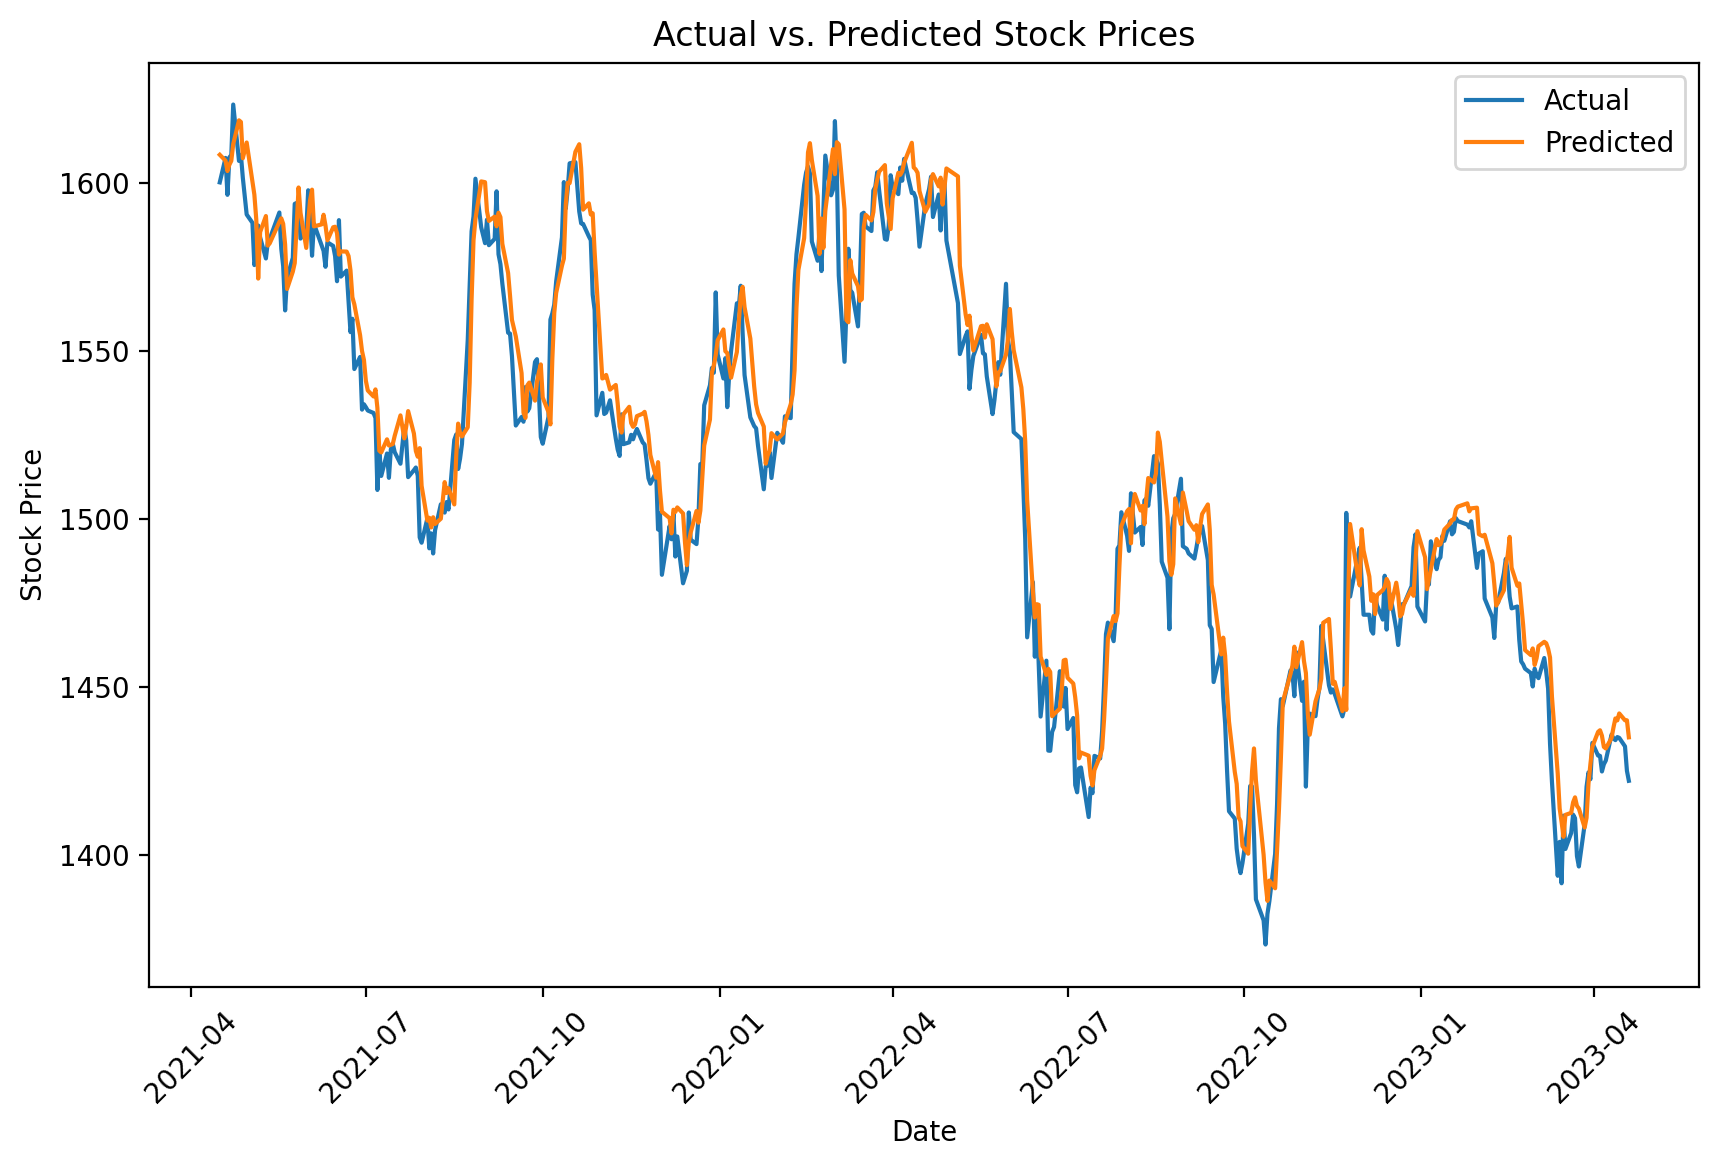

In [8]:
# Inverse transform the test target variable
y_test = y_scaler.inverse_transform(y_test_scaled)

# Inverse transform the predicted target variable
y_pred = y_scaler.inverse_transform(y_pred_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

# Create a plot to visualize the actual vs. predicted stock prices
plt.figure(figsize=(10, 6))
plt.plot(test_df.index, y_test, label='Actual')
plt.plot(test_df.index, y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.xticks(rotation=45)
plt.show()